In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
import os
import collections
import pylab

## Contents of notebook:

**Part 1: Load and plot projected water and sediment discharge through 2100**
- Outputs from each climate model are imported into the notebook
- Dataframes are cleaned up so to perform calculations
- Data are reshaped to obtain mean annual water and sediment discharge
- Data are plotted 

**Part 2: Calculate average water and sediment discharge and annual sediment discharge for each time period**
- Summary statistic csv files are imported into the notebook
- Averages for water discharge, SSC, sediment discharge, and annual sediment discharge are taken over each climate model to get one value per time period

**Part 3: Compare and contrast sediment discharge values calculated via different methods**
- Method 1: Sum method
- Method 2: Sediment rating curve method

# Part 1: Load and plot projected water and sediment discharge through 2100

## 1.1. Import ASCII Data

### 1.1a) GFDL-ESM2M

In [2]:
gfdl_csv = pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/GFDL-ESM2M/ASCII_data_fullrecord_gfdl.csv', dtype=float)
gfdl = pd.DataFrame(gfdl_csv)
gfdl

,Unnamed: 0,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m),CsBin 1
0,0.0,4020.000,20.629,186.701,0.001,0.001,0.001,0.002,1.415,1708.060,1.663,18.95766,0.00009,NaN
1,1.0,4020.000,8.872,186.701,0.000,0.000,0.001,0.001,1.415,1708.060,1.663,20.57500,0.00003,NaN
2,2.0,4020.000,13.528,186.701,0.001,0.001,0.001,0.001,1.415,1708.060,1.663,21.39653,0.00008,NaN
3,3.0,4020.000,14.571,186.701,0.001,0.001,0.001,0.001,1.415,1708.060,1.663,20.54030,0.00050,NaN
4,4.0,4020.000,16.918,186.701,0.001,0.001,0.001,0.001,1.415,1708.060,1.663,19.42194,0.00172,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,43795.0,4020.267,5.237,186.714,NaN,0.000,0.000,0.000,1.415,1708.089,1.663,20.77162,0.00005,0.0
43796,43796.0,4020.154,6.574,186.708,NaN,0.000,0.000,0.001,1.415,1708.077,1.663,21.46326,0.00002,0.0
43797,43797.0,4020.118,7.603,186.707,NaN,0.000,0.000,0.001,1.415,1708.073,1.663,21.64191,0.00000,0.0
43798,43798.0,4020.083,5.876,186.705,NaN,0.000,0.000,0.001,1.415,1708.069,1.663,22.88642,0.00000,0.0


### 1.1b) HadGEM2

In [3]:
hadgem_csv = pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/HadGEM2/ASCII_data_fullrecord_hadgem.csv', dtype=float)
hadgem = pd.DataFrame(hadgem_csv)
hadgem

,Unnamed: 0,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m),CsBin 1
0,0.0,4020.0,28.339,186.701,0.001,0.001,0.002,0.002,1.415,1708.06,1.663,23.83091,0.00025,NaN
1,1.0,4020.0,11.755,186.701,0.001,0.001,0.001,0.001,1.415,1708.06,1.663,22.69632,0.00042,NaN
2,2.0,4020.0,18.251,186.701,0.001,0.001,0.001,0.002,1.415,1708.06,1.663,22.42430,0.00012,NaN
3,3.0,4020.0,19.721,186.701,0.001,0.001,0.001,0.002,1.415,1708.06,1.663,22.82098,0.00057,NaN
4,4.0,4020.0,23.044,186.701,0.001,0.001,0.001,0.002,1.415,1708.06,1.663,23.07992,0.00097,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,43795.0,4020.0,8.446,186.701,NaN,0.000,0.001,0.001,1.415,1708.06,1.663,22.60348,0.00003,0.0
43796,43796.0,4020.0,7.003,186.701,NaN,0.000,0.000,0.001,1.415,1708.06,1.663,22.88877,0.00001,0.0
43797,43797.0,4020.0,4.848,186.701,NaN,0.000,0.000,0.000,1.415,1708.06,1.663,23.17914,0.00002,0.0
43798,43798.0,4020.0,4.801,186.701,NaN,0.000,0.000,0.000,1.415,1708.06,1.663,23.65545,0.00001,0.0


### 1.1c) IPSL_CM5A

In [4]:
ipsl_csv = pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/IPSL_CM5A/ASCII_data_fullrecord_ipsl.csv', dtype=float)
ipsl = pd.DataFrame(ipsl_csv)
ipsl

,Unnamed: 0,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m),CsBin 1
0,0.0,4020.000,14.515,186.701,0.001,0.001,0.001,0.001,1.415,1708.060,1.663,19.63455,0.00000,NaN
1,1.0,4020.000,6.216,186.701,0.000,0.000,0.000,0.001,1.415,1708.060,1.663,21.00546,0.00000,NaN
2,2.0,4020.000,9.499,186.701,0.000,0.000,0.001,0.001,1.415,1708.060,1.663,21.21390,0.00000,NaN
3,3.0,4020.000,10.235,186.701,0.001,0.001,0.001,0.001,1.415,1708.060,1.663,21.94232,0.00002,NaN
4,4.0,4020.000,11.892,186.701,0.001,0.001,0.001,0.001,1.415,1708.060,1.663,21.84154,0.00002,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,43795.0,4020.040,2.791,186.703,NaN,0.000,0.000,0.000,1.415,1708.064,1.663,23.96141,0.00002,0.0
43796,43796.0,4020.037,2.352,186.703,NaN,0.000,0.000,0.000,1.415,1708.064,1.663,23.87579,0.00007,0.0
43797,43797.0,4020.033,1.681,186.703,NaN,0.000,0.000,0.000,1.415,1708.064,1.663,22.55416,0.00004,0.0
43798,43798.0,4020.031,1.666,186.703,NaN,0.000,0.000,0.000,1.415,1708.063,1.663,22.53706,0.00009,0.0


### 1.1d) MIROC-ESM-CHEM

In [5]:
miroc_csv = pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/MIROC-ESM-CHEM/ASCII_data_fullrecord_miroc.csv', dtype=float)
miroc = pd.DataFrame(miroc_csv)
miroc

,Unnamed: 0,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m),CsBin 1
0,0.0,4020.000,19.822,186.701,0.001,0.001,0.001,0.002,1.415,1708.060,1.663,19.95052,0.00067,NaN
1,1.0,4020.000,8.727,186.701,0.000,0.000,0.001,0.001,1.415,1708.060,1.663,21.22921,0.00086,NaN
2,2.0,4020.000,13.152,186.701,0.001,0.001,0.001,0.001,1.415,1708.060,1.663,21.22868,0.00009,NaN
3,3.0,4020.000,14.138,186.701,0.001,0.001,0.001,0.001,1.415,1708.060,1.663,21.42985,0.00002,NaN
4,4.0,4020.000,16.346,186.701,0.001,0.001,0.001,0.001,1.415,1708.060,1.663,21.66668,0.00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,43795.0,4074.352,5.395,189.225,NaN,0.000,0.000,0.000,1.421,1714.035,1.672,26.27167,0.00001,0.0
43796,43796.0,4063.803,6.674,188.736,NaN,0.000,0.000,0.001,1.420,1712.880,1.671,26.86126,0.00000,0.0
43797,43797.0,4053.377,9.676,188.251,NaN,0.000,0.001,0.001,1.419,1711.736,1.669,26.69516,0.00000,0.0
43798,43798.0,4047.171,5.506,187.963,NaN,0.000,0.000,0.000,1.418,1711.054,1.668,27.93077,0.00003,0.0


### 1.1e) NORESM-M

In [6]:
noresm_csv = pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/NORESM-M/ASCII_data_fullrecord_noresm.csv', dtype=float)
noresm = pd.DataFrame(noresm_csv)
noresm

,Unnamed: 0,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m),CsBin 1
0,0.0,4020.000,16.848,186.701,0.001,0.001,0.001,0.001,1.415,1708.060,1.663,20.05498,0.00004,NaN
1,1.0,4020.000,7.258,186.701,0.000,0.000,0.000,0.001,1.415,1708.060,1.663,19.23222,0.00015,NaN
2,2.0,4020.000,11.057,186.701,0.001,0.001,0.001,0.001,1.415,1708.060,1.663,18.74172,0.00072,NaN
3,3.0,4020.000,11.909,186.701,0.001,0.001,0.001,0.001,1.415,1708.060,1.663,19.05534,0.00074,NaN
4,4.0,4020.000,13.822,186.701,0.001,0.001,0.001,0.001,1.415,1708.060,1.663,19.35159,0.00089,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,43795.0,5384.923,28.102,250.092,NaN,0.001,0.001,0.002,1.563,1842.939,1.870,20.25403,0.00000,0.001
43796,43796.0,5097.309,18.581,236.735,NaN,0.001,0.001,0.001,1.534,1816.825,1.829,20.69396,0.00000,0.001
43797,43797.0,4942.551,11.140,229.547,NaN,0.000,0.001,0.001,1.518,1802.319,1.807,20.81297,0.00000,0.000
43798,43798.0,4771.708,9.608,221.613,NaN,0.000,0.001,0.001,1.500,1785.910,1.781,21.12019,0.00000,0.000


## 1.2. Reshape Qw arrays

In [7]:
# 90 rows by 365 columns = 90 years of output data
gfdl_qw = np.array(gfdl['Qw(m3/s)'])
gfdl_qw_reshape = gfdl_qw.reshape(120,365)
gfdl_qw_mean_rows = np.mean(gfdl_qw_reshape, axis = 1)

hadgem_qw = np.array(hadgem['Qw(m3/s)'])
hadgem_qw_reshape = hadgem_qw.reshape(120,365)
hadgem_qw_mean_rows = np.mean(hadgem_qw_reshape, axis = 1)

ipsl_qw = np.array(ipsl['Qw(m3/s)'])
ipsl_qw_reshape = ipsl_qw.reshape(120,365)
ipsl_qw_mean_rows = np.mean(ipsl_qw_reshape, axis = 1)

miroc_qw = np.array(miroc['Qw(m3/s)'])
miroc_qw_reshape = miroc_qw.reshape(120,365)
miroc_qw_mean_rows = np.mean(miroc_qw_reshape, axis = 1)

noresm_qw = np.array(noresm['Qw(m3/s)'])
noresm_qw_reshape = noresm_qw.reshape(120,365)
noresm_qw_mean_rows = np.mean(noresm_qw_reshape, axis = 1)

## 1.3. Plot Qw outputs

### 1.3a) Color plot with NO trendlines

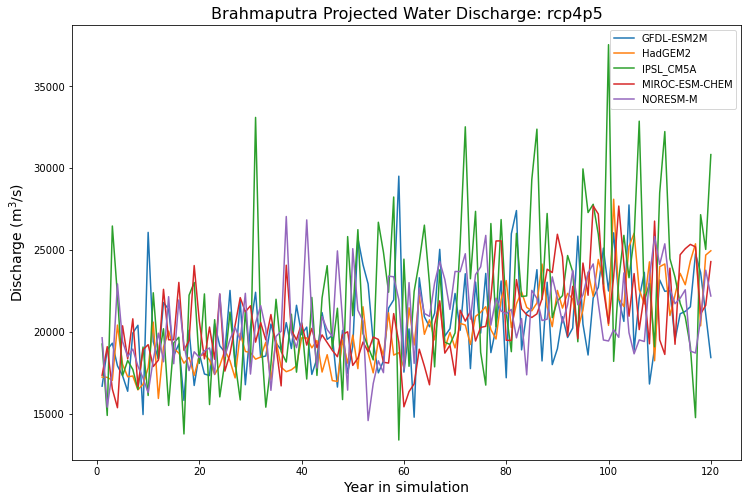

In [8]:
years = np.arange(1, 121, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qw_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qw_mean_rows, color = 'tab:orange', label = 'HadGEM2')
plt.plot(years, ipsl_qw_mean_rows, color = 'tab:green', label = 'IPSL_CM5A')
plt.plot(years, miroc_qw_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qw_mean_rows, color = 'tab:purple', label = 'NORESM-M')
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Brahmaputra Projected Water Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.tight_layout()
fig.savefig('../../figures/v2/projections/brahmaputra_qw_rcp4p5_notrend_color.png')

### 1.3b) Calculate trendlines

In [9]:
# calc the trendline for gfdl
z_gfdl = np.polyfit(years, gfdl_qw_mean_rows, 1)
p_gfdl = np.poly1d(z_gfdl)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_gfdl[0],z_gfdl[1]), '(GFDL-ESM2M)')

# calc the trendline for hadgem
z_hadgem = np.polyfit(years, hadgem_qw_mean_rows, 1)
p_hadgem = np.poly1d(z_hadgem)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_hadgem[0],z_hadgem[1]), '(HadGEM2)')

# calc the trendline for ipsl
z_ipsl = np.polyfit(years, ipsl_qw_mean_rows, 1)
p_ipsl = np.poly1d(z_ipsl)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_ipsl[0],z_ipsl[1]), '(IPSL_CM5A)')

# calc the trendline for miroc
z_miroc = np.polyfit(years, miroc_qw_mean_rows, 1)
p_miroc = np.poly1d(z_miroc)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_miroc[0],z_miroc[1]), '(MIROC-ESM-CHEM)')

# calc the trendline for noresm
z_noresm = np.polyfit(years, noresm_qw_mean_rows, 1)
p_noresm = np.poly1d(z_noresm)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_noresm[0],z_noresm[1]), '(NORESM-M)')

y=30.575563x+(18678.526946) (GFDL-ESM2M)
y=54.847422x+(16852.492550) (HadGEM2)
y=62.756772x+(18198.118144) (IPSL_CM5A)
y=39.664423x+(18255.277950) (MIROC-ESM-CHEM)
y=29.143390x+(19032.858668) (NORESM-M)


### 1.3c) Color plot WITH trendlines

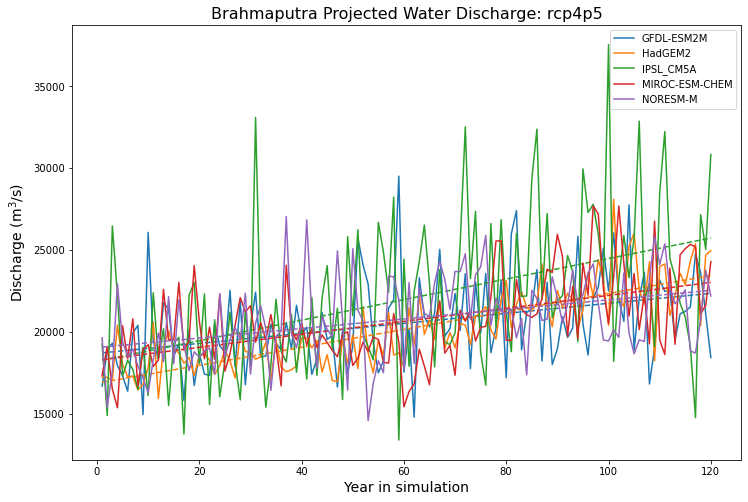

In [10]:
fig, axs = plt.subplots(figsize = (12, 8))

plt.plot(years, gfdl_qw_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M')
pylab.plot(years,p_gfdl(years), color = 'tab:blue', linestyle = 'dashed')

plt.plot(years, hadgem_qw_mean_rows, color = 'tab:orange', label = 'HadGEM2')
pylab.plot(years,p_hadgem(years), color = 'tab:orange', linestyle = 'dashed' )

plt.plot(years, ipsl_qw_mean_rows, color = 'tab:green', label = 'IPSL_CM5A')
pylab.plot(years,p_ipsl(years), color = 'tab:green', linestyle = 'dashed')

plt.plot(years, miroc_qw_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM')
pylab.plot(years,p_miroc(years), color = 'tab:red', linestyle = 'dashed')

plt.plot(years, noresm_qw_mean_rows, color = 'tab:purple', label = 'NORESM-M')
pylab.plot(years,p_noresm(years), color = 'tab:purple', linestyle = 'dashed')

plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Brahmaputra Projected Water Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.tight_layout()
fig.savefig('../../figures/v2/projections/brahmaputra_qw_rcp4p5_trend_color.png')

### 1.3d) B&W plot with NO trendlines

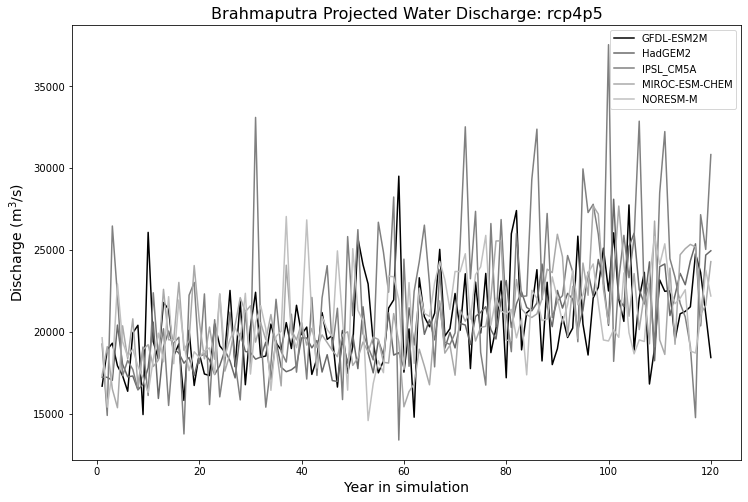

In [11]:
fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qw_mean_rows, color = 'black', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qw_mean_rows, color = 'dimgray', label = 'HadGEM2')
plt.plot(years, ipsl_qw_mean_rows, color = 'gray', label = 'IPSL_CM5A')
plt.plot(years, miroc_qw_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qw_mean_rows, color = 'silver', label = 'NORESM-M')
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Brahmaputra Projected Water Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.tight_layout()
fig.savefig('../../figures/v2/projections/brahmaputra_qw_rcp4p5_notrend_bw.png')

### 1.3e) B&W plot WITH trendlines

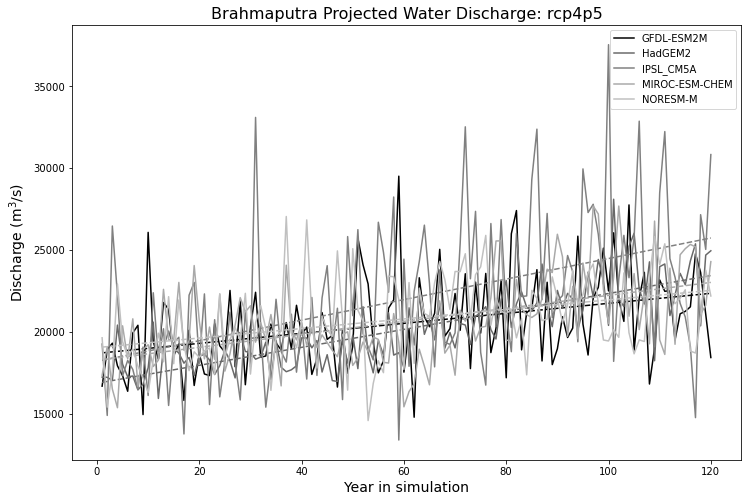

In [12]:
fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qw_mean_rows, color = 'black', label = 'GFDL-ESM2M')
pylab.plot(years,p_gfdl(years), color = 'black', linestyle = 'dashed')

plt.plot(years, hadgem_qw_mean_rows, color = 'dimgray', label = 'HadGEM2')
pylab.plot(years,p_hadgem(years), color = 'dimgray', linestyle = 'dashed' )

plt.plot(years, ipsl_qw_mean_rows, color = 'gray', label = 'IPSL_CM5A')
pylab.plot(years,p_ipsl(years), color = 'gray', linestyle = 'dashed')

plt.plot(years, miroc_qw_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
pylab.plot(years,p_miroc(years), color = 'darkgray', linestyle = 'dashed')

plt.plot(years, noresm_qw_mean_rows, color = 'silver', label = 'NORESM-M')
pylab.plot(years,p_noresm(years), color = 'silver', linestyle = 'dashed')

plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Brahmaputra Projected Water Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.tight_layout()
fig.savefig('../../figures/v2/projections/brahmaputra_qw_rcp4p5_trend_bw.png')

## 1.4. Reshape Qs arrays

In [13]:
# 90 rows by 365 columns = 90 years of output data
gfdl_qs = np.array(gfdl['Qs(kg/s)'])
gfdl_qs_reshape = gfdl_qs.reshape(120,365)
gfdl_qs_mean_rows = np.mean(gfdl_qs_reshape, axis = 1)

hadgem_qs = np.array(hadgem['Qs(kg/s)'])
hadgem_qs_reshape = hadgem_qs.reshape(120,365)
hadgem_qs_mean_rows = np.mean(hadgem_qs_reshape, axis = 1)

ipsl_qs = np.array(ipsl['Qs(kg/s)'])
ipsl_qs_reshape = ipsl_qs.reshape(120,365)
ipsl_qs_mean_rows = np.mean(ipsl_qs_reshape, axis = 1)

miroc_qs = np.array(miroc['Qs(kg/s)'])
miroc_qs_reshape = miroc_qs.reshape(120,365)
miroc_qs_mean_rows = np.mean(miroc_qs_reshape, axis = 1)

noresm_qs = np.array(noresm['Qs(kg/s)'])
noresm_qs_reshape = noresm_qs.reshape(120,365)
noresm_qs_mean_rows = np.mean(noresm_qs_reshape, axis = 1)

## 1.5. Plot Qs outputs

### 1.5a) Color plot with NO trendlines

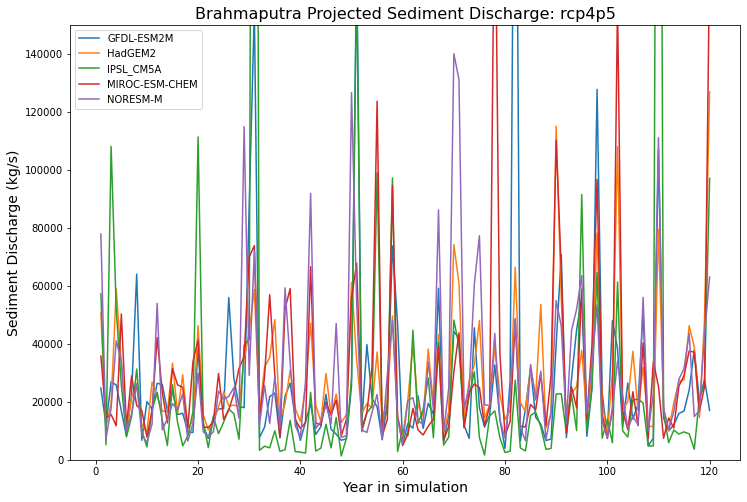

In [14]:
fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qs_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qs_mean_rows, color = 'tab:orange', label = 'HadGEM2')
plt.plot(years, ipsl_qs_mean_rows, color = 'tab:green', label = 'IPSL_CM5A')
plt.plot(years, miroc_qs_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qs_mean_rows, color = 'tab:purple', label = 'NORESM-M')
plt.ylim(0, 1.5e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Brahmaputra Projected Sediment Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.tight_layout()
fig.savefig('../../figures/v2/projections/brahmaputra_qs_rcp4p5_notrend_color.png')

### 1.5b) Calculate trendlines

In [15]:
# calc the trendline for gfdl
z_gfdl = np.polyfit(years, gfdl_qs_mean_rows, 1)
p_gfdl = np.poly1d(z_gfdl)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_gfdl[0],z_gfdl[1]), '(GFDL-ESM2M)')

# calc the trendline for hadgem
z_hadgem = np.polyfit(years, hadgem_qs_mean_rows, 1)
p_hadgem = np.poly1d(z_hadgem)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_hadgem[0],z_hadgem[1]), '(HadGEM2)')

# calc the trendline for ipsl
z_ipsl = np.polyfit(years, ipsl_qs_mean_rows, 1)
p_ipsl = np.poly1d(z_ipsl)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_ipsl[0],z_ipsl[1]), '(IPSL_CM5A)')

# calc the trendline for miroc
z_miroc = np.polyfit(years, miroc_qs_mean_rows, 1)
p_miroc = np.poly1d(z_miroc)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_miroc[0],z_miroc[1]), '(MIROC-ESM-CHEM)')

# calc the trendline for noresm
z_noresm = np.polyfit(years, noresm_qs_mean_rows, 1)
p_noresm = np.poly1d(z_noresm)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_noresm[0],z_noresm[1]), '(NORESM-M)')

y=74.600020x+(23360.297135) (GFDL-ESM2M)
y=133.797594x+(20909.473930) (HadGEM2)
y=6.765583x+(28810.978380) (IPSL_CM5A)
y=122.213821x+(23014.356089) (MIROC-ESM-CHEM)
y=77.349301x+(24998.833017) (NORESM-M)


### 1.5c) Color plot WITH trendlines

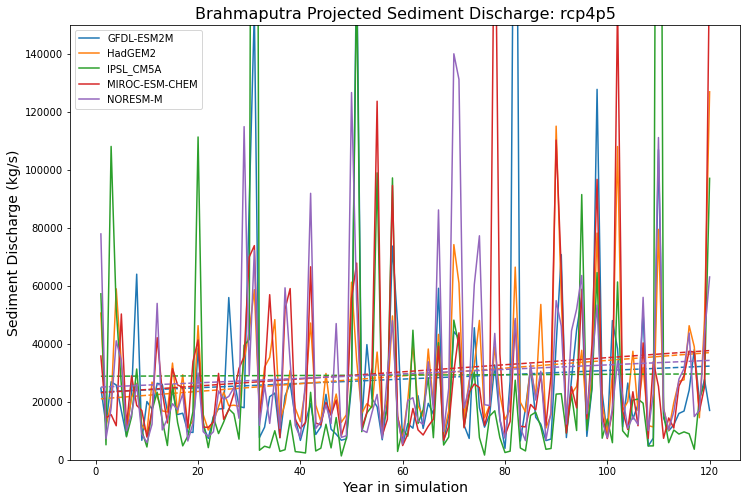

In [16]:
fig, axs = plt.subplots(figsize = (12, 8))

plt.plot(years, gfdl_qs_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M')
pylab.plot(years,p_gfdl(years), color = 'tab:blue', linestyle = 'dashed')

plt.plot(years, hadgem_qs_mean_rows, color = 'tab:orange', label = 'HadGEM2')
pylab.plot(years,p_hadgem(years), color = 'tab:orange', linestyle = 'dashed' )

plt.plot(years, ipsl_qs_mean_rows, color = 'tab:green', label = 'IPSL_CM5A')
pylab.plot(years,p_ipsl(years), color = 'tab:green', linestyle = 'dashed')

plt.plot(years, miroc_qs_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM')
pylab.plot(years,p_miroc(years), color = 'tab:red', linestyle = 'dashed')

plt.plot(years, noresm_qs_mean_rows, color = 'tab:purple', label = 'NORESM-M')
pylab.plot(years,p_noresm(years), color = 'tab:purple', linestyle = 'dashed')

plt.ylim(0, 1.5e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Brahmaputra Projected Sediment Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.tight_layout()
fig.savefig('../../figures/v2/projections/brahmaputra_qs_rcp4p5_trend_color.png')

### 1.5d) B&W plot with NO trendlines

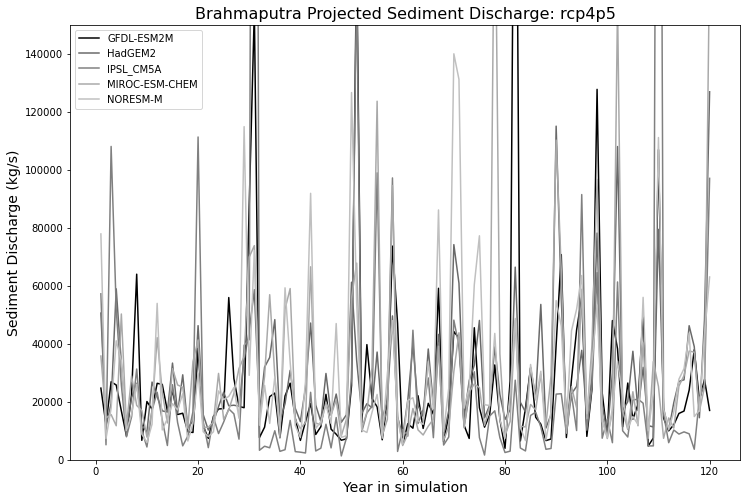

In [17]:
fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qs_mean_rows, color = 'black', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qs_mean_rows, color = 'dimgray', label = 'HadGEM2')
plt.plot(years, ipsl_qs_mean_rows, color = 'gray', label = 'IPSL_CM5A')
plt.plot(years, miroc_qs_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qs_mean_rows, color = 'silver', label = 'NORESM-M')
plt.ylim(0, 1.5e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Brahmaputra Projected Sediment Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.tight_layout()
fig.savefig('../../figures/v2/projections/brahmaputra_qs_rcp4p5_notrend_bw.png')

### 1.5e) B&W plot WITH trendlines

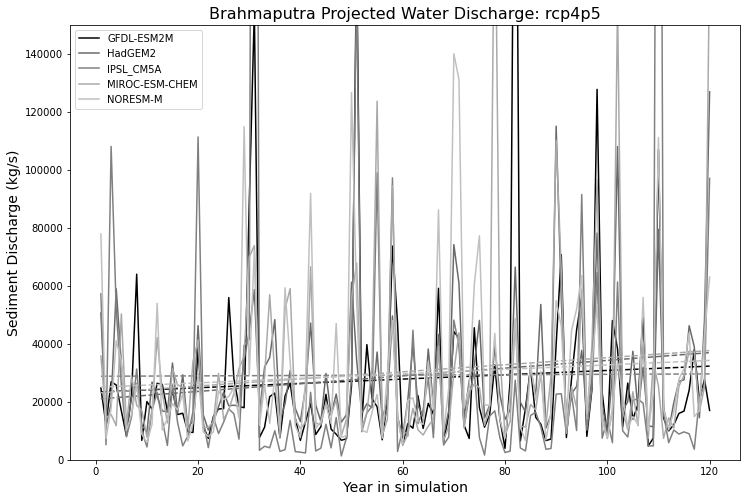

In [18]:
fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qs_mean_rows, color = 'black', label = 'GFDL-ESM2M')
pylab.plot(years,p_gfdl(years), color = 'black', linestyle = 'dashed')

plt.plot(years, hadgem_qs_mean_rows, color = 'dimgray', label = 'HadGEM2')
pylab.plot(years,p_hadgem(years), color = 'dimgray', linestyle = 'dashed' )

plt.plot(years, ipsl_qs_mean_rows, color = 'gray', label = 'IPSL_CM5A')
pylab.plot(years,p_ipsl(years), color = 'gray', linestyle = 'dashed')

plt.plot(years, miroc_qs_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
pylab.plot(years,p_miroc(years), color = 'darkgray', linestyle = 'dashed')

plt.plot(years, noresm_qs_mean_rows, color = 'silver', label = 'NORESM-M')
pylab.plot(years,p_noresm(years), color = 'silver', linestyle = 'dashed')

plt.ylim(0, 1.5e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Brahmaputra Projected Water Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.tight_layout()
fig.savefig('../../figures/v2/projections/brahmaputra_qs_rcp4p5_trend_bw.png')

# Part 2: Calculate average water and sediment discharge and annual sediment discharge for each time period

## 2.1. Import Summary Statistics

### 2.1a) GFDL-ESM2M

In [19]:
gfdl_2000 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/reference/GFDL-ESM2M/summ_stats_v3.csv', dtype=float))
gfdl_2020 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/GFDL-ESM2M/2020/summ_stats_v3.csv', dtype=float))
gfdl_2040 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/GFDL-ESM2M/2040/summ_stats_v3.csv', dtype=float))
gfdl_2060 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/GFDL-ESM2M/2060/summ_stats_v3.csv', dtype=float))
gfdl_2080 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/GFDL-ESM2M/2080/summ_stats_v3.csv', dtype=float))

frames_gfdl = [gfdl_2000, gfdl_2020, gfdl_2040, gfdl_2060, gfdl_2080]
concat_gfdl = pd.concat(frames_gfdl)
concat_gfdl.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [20]:
gfdl_change = ((gfdl_2080 - gfdl_2000)/gfdl_2000)*100
concat_gfdl = concat_gfdl.append(gfdl_change)

concat_gfdl.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,19007.73728,23512.14093,0.49022,882.77768,117687.65446,1.455056e+06,18.54244,5465.77601,18926.31719,...,8367.79027,511.45198,0.06966,388.62587,45092.77940,61169.20520,1.34779,2094.24712,210.0,219.00000
0,2020,20163.88165,26876.01884,0.42658,936.47257,158431.91980,4.372089e+06,38.22618,7358.06479,20827.27057,...,8362.64887,318.93775,0.04590,388.38709,49554.86733,48330.24218,1.00008,2301.48019,203.0,212.00000
0,2040,21087.94119,28643.61791,0.47483,979.38874,160061.75086,4.989658e+06,44.88742,7433.75915,22344.65517,...,8201.32888,371.56143,0.05265,380.89489,52683.52842,63498.40193,1.23048,2446.78481,200.0,212.00000
0,2060,21373.74205,29951.16515,0.41394,992.66220,179056.66368,1.183413e+07,66.29686,8315.94122,23132.80143,...,8681.21903,320.50371,0.04305,403.18247,53715.44302,48800.55519,0.93508,2494.71010,203.0,203.00000
0,2080,21806.97803,30766.10612,0.47898,1012.78301,157949.70437,4.121197e+06,33.72761,7335.66922,23377.80098,...,8780.56752,418.85389,0.05458,407.79651,54238.66413,64569.88789,1.21324,2519.01009,210.0,201.00000
0,NaN,14.72685,30.85200,-2.29178,14.72685,34.21094,1.832329e+02,81.89415,34.21094,23.52007,...,4.93293,-18.10494,-21.65250,4.93293,20.28237,5.55947,-9.98309,20.28237,0.0,-8.21918


### 2.1b) HadGEM2

In [21]:
hadgem_2000 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/reference/HadGEM2/summ_stats_v3.csv', dtype=float))
hadgem_2020 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/HadGEM2/2020/summ_stats_v3.csv', dtype=float))
hadgem_2040 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/HadGEM2/2040/summ_stats_v3.csv', dtype=float))
hadgem_2060 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/HadGEM2/2060/summ_stats_v3.csv', dtype=float))
hadgem_2080 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/HadGEM2/2080/summ_stats_v3.csv', dtype=float))

frames_hadgem = [hadgem_2000, hadgem_2020, hadgem_2040, hadgem_2060, hadgem_2080]
concat_hadgem = pd.concat(frames_hadgem)
concat_hadgem.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [22]:
hadgem_change = ((hadgem_2080 - hadgem_2000)/hadgem_2000)*100
concat_hadgem = concat_hadgem.append(hadgem_change)

concat_hadgem.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,18167.21093,23354.32949,0.54694,843.74105,86981.79147,1.129486e+06,13.19387,4039.70146,17392.80247,...,7979.94370,484.08164,0.07137,370.61309,44854.78988,73935.36828,1.65424,2083.19416,187.00000,205.00000
0,2020,18521.04289,26605.12657,0.61007,860.17410,89148.95607,9.347869e+05,13.44709,4140.35123,17825.36546,...,7991.57233,559.39118,0.08344,371.15316,45841.51051,78133.93071,1.72447,2129.02050,187.00000,188.00000
0,2040,19927.83378,28790.70326,0.59676,925.50979,90756.93434,1.374920e+06,18.33723,4215.03068,19021.39650,...,8700.73621,603.19079,0.08478,404.08890,49122.68622,73577.01593,1.56037,2281.40837,190.00000,196.00000
0,2060,21477.25389,32455.15350,0.62904,997.46961,90935.38351,2.110450e+06,26.43037,4223.31841,20525.95716,...,10729.48435,934.66276,0.09934,498.31020,53041.72818,79916.27484,1.59420,2463.42071,193.00000,194.00000
0,2080,22937.58018,34861.36494,0.61829,1065.29165,101956.98516,2.506118e+06,24.58015,4735.19543,22016.63441,...,12245.71810,1150.01112,0.10106,568.72875,55224.86098,84994.14062,1.59275,2564.81210,190.00000,187.00000
0,NaN,26.25813,49.27153,13.04619,26.25813,17.21647,1.218813e+02,86.29973,17.21647,26.58474,...,53.45620,137.56553,41.59401,53.45620,23.11921,14.95735,-3.71715,23.11921,1.60428,-8.78049


### 2.1c) IPSL_CM5A

In [23]:
ipsl_2000 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/reference/IPSL_CM5A/summ_stats_v3.csv', dtype=float))
ipsl_2020 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/IPSL_CM5A/2020/summ_stats_v3.csv', dtype=float))
ipsl_2040 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/IPSL_CM5A/2040/summ_stats_v3.csv', dtype=float))
ipsl_2060 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/IPSL_CM5A/2060/summ_stats_v3.csv', dtype=float))
ipsl_2080 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/IPSL_CM5A/2080/summ_stats_v3.csv', dtype=float))

frames_ipsl = [ipsl_2000, ipsl_2020, ipsl_2040, ipsl_2060, ipsl_2080]
concat_ipsl = pd.concat(frames_ipsl)
concat_ipsl.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [24]:
ipsl_change = ((ipsl_2080 - ipsl_2000)/ipsl_2000)*100
concat_ipsl = concat_ipsl.append(ipsl_change)

concat_ipsl.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,18908.29030,24367.91993,0.41263,878.15906,150263.31073,3.865487e+06,38.23733,6978.68950,20135.98324,...,7949.38377,288.02096,0.04154,369.19379,49467.74425,48983.19776,1.01619,2297.43392,214.00000,214.00000
0,2020,21037.24932,28619.32517,0.25051,977.03445,238675.46290,2.182970e+07,91.46184,11084.82130,23622.34079,...,8413.78286,119.95560,0.01623,390.76191,56221.73448,20323.82206,0.37650,2611.10997,214.00000,177.00000
0,2040,22415.34494,32080.34549,0.46580,1041.03744,152155.07674,2.954342e+06,26.10863,7066.54893,24996.07816,...,9331.28990,380.39062,0.04848,433.37375,60603.46622,66126.87687,1.07105,2814.61104,213.00000,212.00000
0,2060,24761.45083,35636.35886,0.29295,1149.99780,232512.95918,1.555145e+07,70.59426,10798.61571,28174.33297,...,10140.90519,179.85078,0.02167,470.97477,63780.87397,28003.17234,0.45517,2962.17961,213.00000,163.00000
0,2080,24748.33006,37023.09043,0.39908,1149.38843,232485.27797,2.164827e+07,115.22767,10797.33011,28093.12541,...,10190.04655,339.55257,0.03878,473.25705,62356.87116,45858.32029,0.71869,2896.04455,213.00000,187.00000
0,NaN,30.88613,51.93373,-3.28365,30.88613,54.71859,4.600399e+02,201.34860,54.71859,39.51703,...,28.18662,17.89162,-6.63374,28.18662,26.05562,-6.37949,-29.27576,26.05562,-0.46729,-12.61682


### 2.1d) MIROC-ESM-CHEM

In [25]:
miroc_2000 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/reference/MIROC-ESM-CHEM/summ_stats_v3.csv', dtype=float))
miroc_2020 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/MIROC-ESM-CHEM/2020/summ_stats_v3.csv', dtype=float))
miroc_2040 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/MIROC-ESM-CHEM/2040/summ_stats_v3.csv', dtype=float))
miroc_2060 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/MIROC-ESM-CHEM/2060/summ_stats_v3.csv', dtype=float))
miroc_2080 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/MIROC-ESM-CHEM/2080/summ_stats_v3.csv', dtype=float))

frames_miroc = [miroc_2000, miroc_2020, miroc_2040, miroc_2060, miroc_2080]
concat_miroc = pd.concat(frames_miroc)
concat_miroc.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [26]:
miroc_change = ((miroc_2080 - miroc_2000)/miroc_2000)*100
concat_miroc = concat_miroc.append(miroc_change)

concat_miroc.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,19571.46597,24402.23858,0.51980,908.95897,123007.66967,1.027329e+06,13.05090,5712.85385,18899.57248,...,9514.94901,712.11797,0.08070,441.90345,47785.35408,69667.01631,1.49018,2219.29856,205.00000,203.00000
0,2020,19377.16320,27299.53797,0.51444,899.93495,127094.83335,1.862458e+06,25.73061,5902.67428,19236.21593,...,9871.75329,716.53984,0.07789,458.47453,47695.43472,58738.00495,1.26738,2215.12243,208.00000,193.00000
0,2040,19406.12209,29788.65574,0.51990,901.27989,128220.47674,3.788252e+06,29.80842,5954.95262,18798.02248,...,10450.20901,783.42438,0.08245,485.33979,45130.26136,50806.70396,1.13297,2095.98790,201.00000,209.00000
0,2060,22268.25666,33649.80324,0.58719,1034.20621,132399.43764,6.034445e+06,45.57757,6149.03639,21177.57765,...,12990.51592,1431.24453,0.11851,603.31944,52725.01570,74450.36478,1.47889,2448.71161,200.00000,226.00000
0,2080,22925.42228,35713.84829,0.58862,1064.72700,140044.53735,6.291164e+06,53.49233,6504.09829,21971.11125,...,13201.46121,1382.30310,0.11027,613.11639,53836.54028,72201.20506,1.38696,2500.33422,199.00000,197.00000
0,NaN,17.13697,46.35480,13.23992,17.13697,13.85025,5.123804e+02,309.87451,13.85025,16.25190,...,38.74442,94.11153,36.63254,38.74442,12.66327,3.63757,-6.92664,12.66327,-2.92683,-2.95567


### 2.1e) NORESM-M

In [27]:
noresm_2000 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/reference/NORESM-M/summ_stats_v3.csv', dtype=float))
noresm_2020 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/NORESM-M/2020/summ_stats_v3.csv', dtype=float))
noresm_2040 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/NORESM-M/2040/summ_stats_v3.csv', dtype=float))
noresm_2060 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/NORESM-M/2060/summ_stats_v3.csv', dtype=float))
noresm_2080 = pd.DataFrame(pd.read_csv('../../setup/run_2/Brahmaputra/rcp4p5/NORESM-M/2080/summ_stats_v3.csv', dtype=float))

frames_noresm = [noresm_2000, noresm_2020, noresm_2040, noresm_2060, noresm_2080]
concat_noresm = pd.concat(frames_noresm)
concat_noresm.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [28]:
noresm_change = ((noresm_2080 - noresm_2000)/noresm_2000)*100
concat_noresm = concat_noresm.append(noresm_change)

concat_noresm.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,19046.30275,24032.26428,0.45500,884.56878,132288.73140,3.223192e+06,26.49407,6143.89485,19088.20450,...,8661.53386,436.53303,0.05705,402.26823,48972.54814,56861.49849,1.19287,2274.43550,191.00000,201.00000
0,2020,20405.50074,27273.37380,0.48559,947.69411,145669.35423,2.124974e+06,23.75821,6765.33206,20530.08201,...,9388.96995,514.09179,0.06040,436.05259,50796.67318,58042.45068,1.18256,2359.15346,191.00000,192.00000
0,2040,21435.70825,29764.07754,0.49489,995.54011,141314.29712,2.919845e+06,32.74392,6563.06984,22343.28323,...,9375.25930,528.10042,0.06513,435.41583,54457.16516,67295.10061,1.23470,2529.15795,194.00000,196.00000
0,2060,21881.87882,30812.68920,0.50466,1016.26164,123351.87260,3.860649e+06,36.10754,5728.83969,22361.54504,...,10692.55127,654.26745,0.07025,496.59491,53670.24087,66647.32577,1.26360,2492.61077,191.00000,187.00000
0,2080,21695.92912,31316.73269,0.54157,1007.62556,126424.75114,2.438216e+06,27.24902,5871.55360,21763.03906,...,10027.05035,676.31262,0.07510,465.68700,54521.70674,72973.42516,1.36969,2532.15546,187.00000,187.00000
0,NaN,13.91150,30.31120,19.02746,13.91150,-4.43271,-2.435399e+01,2.84953,-4.43271,14.01302,...,15.76530,54.92816,31.63005,15.76530,11.33116,28.33539,14.82285,11.33116,-2.09424,-6.96517


***Important Note***

Before moving on, check that the data in the summary statistics tables in 2.1 a-e) seem adequate. Values with an exponent of >100 are not accurate, and HydroTrend must be re-run for that specific model run. Do this via the terminal by navigating to the project folder/repository (ht_gbmd), then:

> conda activate pymt

> python setup/run_2/Ganga/rcp4p5/HadGEM2/2060/run_HT_v2.py (or whichever run seems erroneous)

Then clear the kernel and re-run this notebook. See if the error subsided. 

This problem occurs due to a wrapping error in HydroTrend, which requires developer input to fix, which is beyond the scope of this project. You may need to re-run the model several times.

## 2.2. Calculate average Qw (m^3/s), Qs (kg/s), SSC (mg/l), and Qs (MT/yr)

### 2.2a) Average Water Discharge (over all climate scenarios)

In [29]:
avg_qw_ref = np.mean([gfdl_2000['Mean Qw'].to_numpy(), hadgem_2000['Mean Qw'].to_numpy(), ipsl_2000['Mean Qw'].to_numpy(), miroc_2000['Mean Qw'].to_numpy(), noresm_2000['Mean Qw'].to_numpy()])
avg_qw_2020 = np.mean([gfdl_2020['Mean Qw'].to_numpy(), hadgem_2020['Mean Qw'].to_numpy(), ipsl_2020['Mean Qw'].to_numpy(), miroc_2020['Mean Qw'].to_numpy(), noresm_2020['Mean Qw'].to_numpy()])
avg_qw_2040 = np.mean([gfdl_2040['Mean Qw'].to_numpy(), hadgem_2040['Mean Qw'].to_numpy(), ipsl_2040['Mean Qw'].to_numpy(), miroc_2040['Mean Qw'].to_numpy(), noresm_2040['Mean Qw'].to_numpy()])
avg_qw_2060 = np.mean([gfdl_2060['Mean Qw'].to_numpy(), hadgem_2060['Mean Qw'].to_numpy(), ipsl_2060['Mean Qw'].to_numpy(), miroc_2060['Mean Qw'].to_numpy(), noresm_2060['Mean Qw'].to_numpy()])
avg_qw_2080 = np.mean([gfdl_2080['Mean Qw'].to_numpy(), hadgem_2080['Mean Qw'].to_numpy(), ipsl_2080['Mean Qw'].to_numpy(), miroc_2080['Mean Qw'].to_numpy(), noresm_2080['Mean Qw'].to_numpy()])

In [30]:
print('2000 Avg. Qw (m^3/s): {:.6}'.format(avg_qw_ref))
print('2020 Avg. Qw (m^3/s): {:.6}'.format(avg_qw_2020))
print('2040 Avg. Qw (m^3/s): {:.6}'.format(avg_qw_2040))
print('2060 Avg. Qw (m^3/s): {:.6}'.format(avg_qw_2060))
print('2080 Avg. Qw (m^3/s): {:.6}'.format(avg_qw_2080))

2000 Avg. Qw (m^3/s): 18940.2
2020 Avg. Qw (m^3/s): 19901.0
2040 Avg. Qw (m^3/s): 20854.6
2060 Avg. Qw (m^3/s): 22352.5
2080 Avg. Qw (m^3/s): 22822.8


### 2.2b) Average sediment discharge (kg/s)

In [31]:
avg_qs_ref = np.mean([gfdl_2000['Mean Qs'].to_numpy(), hadgem_2000['Mean Qs'].to_numpy(), ipsl_2000['Mean Qs'].to_numpy(), miroc_2000['Mean Qs'].to_numpy(), noresm_2000['Mean Qs'].to_numpy()])
avg_qs_2020 = np.mean([gfdl_2020['Mean Qs'].to_numpy(), hadgem_2020['Mean Qs'].to_numpy(), ipsl_2020['Mean Qs'].to_numpy(), miroc_2020['Mean Qs'].to_numpy(), noresm_2020['Mean Qs'].to_numpy()])
avg_qs_2040 = np.mean([gfdl_2040['Mean Qs'].to_numpy(), hadgem_2040['Mean Qs'].to_numpy(), ipsl_2040['Mean Qs'].to_numpy(), miroc_2040['Mean Qs'].to_numpy(), noresm_2040['Mean Qs'].to_numpy()])
avg_qs_2060 = np.mean([gfdl_2060['Mean Qs'].to_numpy(), hadgem_2060['Mean Qs'].to_numpy(), ipsl_2060['Mean Qs'].to_numpy(), miroc_2060['Mean Qs'].to_numpy(), noresm_2060['Mean Qs'].to_numpy()])
avg_qs_2080 = np.mean([gfdl_2080['Mean Qs'].to_numpy(), hadgem_2080['Mean Qs'].to_numpy(), ipsl_2080['Mean Qs'].to_numpy(), miroc_2080['Mean Qs'].to_numpy(), noresm_2080['Mean Qs'].to_numpy()])

In [32]:
print('2000 Avg. Qs (kg/s): {:.6}'.format(avg_qs_ref))
print('2020 Avg. Qs (kg/s): {:.6}'.format(avg_qs_2020))
print('2040 Avg. Qs (kg/s): {:.6}'.format(avg_qs_2040))
print('2060 Avg. Qs (kg/s): {:.6}'.format(avg_qs_2060))
print('2080 Avg. Qs (kg/s): {:.6}'.format(avg_qs_2080))

2000 Avg. Qs (kg/s): 23933.8
2020 Avg. Qs (kg/s): 27334.7
2040 Avg. Qs (kg/s): 29813.5
2060 Avg. Qs (kg/s): 32501.0
2080 Avg. Qs (kg/s): 33936.2


### 2.2c) Average SSC (mg/l)

In [33]:
avg_SSC_ref = np.mean([gfdl_2000['Mean SSC'].to_numpy(), hadgem_2000['Mean SSC'].to_numpy(), ipsl_2000['Mean SSC'].to_numpy(), miroc_2000['Mean SSC'].to_numpy(), noresm_2000['Mean SSC'].to_numpy()])
avg_SSC_2020 = np.mean([gfdl_2020['Mean SSC'].to_numpy(), hadgem_2020['Mean SSC'].to_numpy(), ipsl_2020['Mean SSC'].to_numpy(), miroc_2020['Mean SSC'].to_numpy(), noresm_2020['Mean SSC'].to_numpy()])
avg_SSC_2040 = np.mean([gfdl_2040['Mean SSC'].to_numpy(), hadgem_2040['Mean SSC'].to_numpy(), ipsl_2040['Mean SSC'].to_numpy(), miroc_2040['Mean SSC'].to_numpy(), noresm_2040['Mean SSC'].to_numpy()])
avg_SSC_2060 = np.mean([gfdl_2060['Mean SSC'].to_numpy(), hadgem_2060['Mean SSC'].to_numpy(), ipsl_2060['Mean SSC'].to_numpy(), miroc_2060['Mean SSC'].to_numpy(), noresm_2060['Mean SSC'].to_numpy()])
avg_SSC_2080 = np.mean([gfdl_2080['Mean SSC'].to_numpy(), hadgem_2080['Mean SSC'].to_numpy(), ipsl_2080['Mean SSC'].to_numpy(), miroc_2080['Mean SSC'].to_numpy(), noresm_2080['Mean SSC'].to_numpy()])

In [34]:
print('2000 Avg. SSC (mg/l): {:.3}'.format(avg_SSC_ref))
print('2020 Avg. SSC (mg/l): {:.3}'.format(avg_SSC_2020))
print('2040 Avg. SSC (mg/l): {:.3}'.format(avg_SSC_2040))
print('2060 Avg. SSC (mg/l): {:.3}'.format(avg_SSC_2060))
print('2080 Avg. SSC (mg/l): {:.3}'.format(avg_SSC_2080))

2000 Avg. SSC (mg/l): 0.485
2020 Avg. SSC (mg/l): 0.457
2040 Avg. SSC (mg/l): 0.51
2060 Avg. SSC (mg/l): 0.486
2080 Avg. SSC (mg/l): 0.525


### 2.2d) Annual Average Sediment Discharge (MT/yr)

In [35]:
print('2000 Avg. Qs (MT/yr): {:.4}'.format(avg_qs_ref*3.14e7/1e9))
print('2020 Avg. Qs (MT/yr): {:.4}'.format(avg_qs_2020*3.14e7/1e9))
print('2040 Avg. Qs (MT/yr): {:.4}'.format(avg_qs_2040*3.14e7/1e9))
print('2060 Avg. Qs (MT/yr): {:.5}'.format(avg_qs_2060*3.14e7/1e9))
print('2080 Avg. Qs (MT/yr): {:.5}'.format(avg_qs_2080*3.14e7/1e9))

2000 Avg. Qs (MT/yr): 751.5
2020 Avg. Qs (MT/yr): 858.3
2040 Avg. Qs (MT/yr): 936.1
2060 Avg. Qs (MT/yr): 1020.5
2080 Avg. Qs (MT/yr): 1065.6


# Part 3: Compare and contrast sediment discharge values calculated via different methods**

## 3.1. Method 1: Sum method (manual averaging)

In [36]:
# sum all the outputs and divide by the number of outputs
gfdl_qs_kgs_20 = gfdl['Qs(kg/s)'][0:10950].sum()/10950
gfdl_qs_kgs_40 = gfdl['Qs(kg/s)'][7300:18250].sum()/10950
gfdl_qs_kgs_60 = gfdl['Qs(kg/s)'][14600:25550].sum()/10950
gfdl_qs_kgs_80 = gfdl['Qs(kg/s)'][21900:].sum()/10950

hadgem_qs_kgs_20 = hadgem['Qs(kg/s)'][0:10950].sum()/10950
hadgem_qs_kgs_40 = hadgem['Qs(kg/s)'][7300:18250].sum()/10950
hadgem_qs_kgs_60 = hadgem['Qs(kg/s)'][14600:25550].sum()/10950
hadgem_qs_kgs_80 = hadgem['Qs(kg/s)'][21900:].sum()/10950

ipsl_qs_kgs_20 = ipsl['Qs(kg/s)'][0:10950].sum()/10950
ipsl_qs_kgs_40 = ipsl['Qs(kg/s)'][7300:18250].sum()/10950
ipsl_qs_kgs_60 = ipsl['Qs(kg/s)'][14600:25550].sum()/10950
ipsl_qs_kgs_80 = ipsl['Qs(kg/s)'][21900:].sum()/10950

miroc_qs_kgs_20 = miroc['Qs(kg/s)'][0:10950].sum()/10950
miroc_qs_kgs_40 = miroc['Qs(kg/s)'][7300:18250].sum()/10950
miroc_qs_kgs_60 = miroc['Qs(kg/s)'][14600:25550].sum()/10950
miroc_qs_kgs_80 = miroc['Qs(kg/s)'][21900:].sum()/10950

noresm_qs_kgs_20 = noresm['Qs(kg/s)'][0:10950].sum()/10950
noresm_qs_kgs_40 = noresm['Qs(kg/s)'][7300:18250].sum()/10950
noresm_qs_kgs_60 = noresm['Qs(kg/s)'][14600:25550].sum()/10950
noresm_qs_kgs_80 = noresm['Qs(kg/s)'][21900:].sum()/10950

In [37]:
# convert averages from kg/s to mt/yr
gfdl_qs_mtyr_20 = gfdl_qs_kgs_20*3.14e7/1e9
gfdl_qs_mtyr_40 = gfdl_qs_kgs_40*3.14e7/1e9
gfdl_qs_mtyr_60 = gfdl_qs_kgs_60*3.14e7/1e9
gfdl_qs_mtyr_80 = gfdl_qs_kgs_80*3.14e7/1e9

hadgem_qs_mtyr_20 = hadgem_qs_kgs_20*3.14e7/1e9
hadgem_qs_mtyr_40 = hadgem_qs_kgs_40*3.14e7/1e9
hadgem_qs_mtyr_60 = hadgem_qs_kgs_60*3.14e7/1e9
hadgem_qs_mtyr_80 = hadgem_qs_kgs_80*3.14e7/1e9

ipsl_qs_mtyr_20 = ipsl_qs_kgs_20*3.14e7/1e9
ipsl_qs_mtyr_40 = ipsl_qs_kgs_40*3.14e7/1e9
ipsl_qs_mtyr_60 = ipsl_qs_kgs_60*3.14e7/1e9
ipsl_qs_mtyr_80 = ipsl_qs_kgs_80*3.14e7/1e9

miroc_qs_mtyr_20 = miroc_qs_kgs_20*3.14e7/1e9
miroc_qs_mtyr_40 = miroc_qs_kgs_40*3.14e7/1e9
miroc_qs_mtyr_60 = miroc_qs_kgs_60*3.14e7/1e9
miroc_qs_mtyr_80 = miroc_qs_kgs_80*3.14e7/1e9

noresm_qs_mtyr_20 = noresm_qs_kgs_20*3.14e7/1e9
noresm_qs_mtyr_40 = noresm_qs_kgs_40*3.14e7/1e9
noresm_qs_mtyr_60 = noresm_qs_kgs_60*3.14e7/1e9
noresm_qs_mtyr_80 = noresm_qs_kgs_80*3.14e7/1e9

In [38]:
print('Annual sediment discharge using sum method (MT/yr):')
print('GFDL: {:.5} (2020), {:.5} (2040), {:.5} (2060), {:.5} (2080)'.format(gfdl_qs_mtyr_20, gfdl_qs_mtyr_40, gfdl_qs_mtyr_60, gfdl_qs_mtyr_80))
print('HadGEM: {:.5} (2020), {:.5} (2040), {:.5} (2060), {:.5} (2080)'.format(hadgem_qs_mtyr_20, hadgem_qs_mtyr_40, hadgem_qs_mtyr_60, hadgem_qs_mtyr_80))
print('IPSL: {:.5} (2020), {:.5} (2040), {:.5} (2060), {:.5} (2080)'.format(ipsl_qs_mtyr_20, ipsl_qs_mtyr_40, ipsl_qs_mtyr_60, ipsl_qs_mtyr_80))
print('MIROC: {:.5} (2020), {:.5} (2040), {:.5} (2060), {:.5} (2080)'.format(miroc_qs_mtyr_20, miroc_qs_mtyr_40, miroc_qs_mtyr_60, miroc_qs_mtyr_80))
print('NORESM: {:.5} (2020), {:.5} (2040), {:.5} (2060), {:.5} (2080)'.format(noresm_qs_mtyr_20, noresm_qs_mtyr_40, noresm_qs_mtyr_60, noresm_qs_mtyr_80))

Annual sediment discharge using sum method (MT/yr):
GFDL: 738.28 (2020), 740.87 (2040), 806.23 (2060), 1873.2 (2080)
HadGEM: 733.33 (2020), 797.75 (2040), 824.97 (2060), 2094.2 (2080)
IPSL: 765.15 (2020), 948.17 (2040), 805.78 (2060), 1670.5 (2080)
MIROC: 766.23 (2020), 880.27 (2040), 820.99 (2060), 2035.6 (2080)
NORESM: 754.61 (2020), 958.05 (2040), 1006.1 (2060), 2077.1 (2080)


In [39]:
print('Average annual sediment discharge over all climate models (MT/yr):')
print('2020: {:.5}'.format((gfdl_qs_mtyr_20 + hadgem_qs_mtyr_20 + miroc_qs_mtyr_20 + noresm_qs_mtyr_20)/4))
print('2040: {:.5}'.format((gfdl_qs_mtyr_40 + hadgem_qs_mtyr_40 + miroc_qs_mtyr_40 + noresm_qs_mtyr_40)/4))
print('2060: {:.5}'.format((gfdl_qs_mtyr_60 + hadgem_qs_mtyr_60 + miroc_qs_mtyr_60 + noresm_qs_mtyr_60)/4))
print('2080: {:.5}'.format((gfdl_qs_mtyr_80 + hadgem_qs_mtyr_80 + miroc_qs_mtyr_80 + noresm_qs_mtyr_80)/4))

Average annual sediment discharge over all climate models (MT/yr):
2020: 748.11
2040: 844.23
2060: 864.58
2080: 2020.0
